In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score


In [3]:
import pandas as pd
import glob

path = r'sample_data/dates'
all_files = glob.glob(path + "/*.csv")

colnames=['Time','Solar_1', 'Solar_2', 'Solar_3', 'Wind_1', 'Wind_2','Battery']

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None, names=colnames)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324240 entries, 0 to 324239
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     324240 non-null  int64  
 1   Solar_1  324240 non-null  float64
 2   Solar_2  324240 non-null  float64
 3   Solar_3  324240 non-null  float64
 4   Wind_1   324240 non-null  float64
 5   Wind_2   324240 non-null  float64
 6   Battery  324240 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 17.3 MB


,Time,Solar_1,Solar_2,Solar_3,Wind_1,Wind_2,Battery
0,1313280000,3.946,0.0025,3.9361,3.4333,3.9361,12.2798
1,1313280005,3.946,0.0025,3.9361,3.4333,3.9361,12.2798
2,1313280010,3.946,0.0025,3.9361,3.4333,3.9361,12.2798
3,1313280015,3.946,0.0025,3.9361,3.4333,3.9361,12.2798
4,1313280020,3.946,0.0025,3.9361,3.4333,3.9361,12.2798


In [4]:
from datetime import datetime
df['Time']= df['Time'].apply(datetime.fromtimestamp)

df.head()

,Time,Solar_1,Solar_2,Solar_3,Wind_1,Wind_2,Battery
0,2011-08-14 00:00:00,3.946,0.0025,3.9361,3.4333,3.9361,12.2798
1,2011-08-14 00:00:05,3.946,0.0025,3.9361,3.4333,3.9361,12.2798
2,2011-08-14 00:00:10,3.946,0.0025,3.9361,3.4333,3.9361,12.2798
3,2011-08-14 00:00:15,3.946,0.0025,3.9361,3.4333,3.9361,12.2798
4,2011-08-14 00:00:20,3.946,0.0025,3.9361,3.4333,3.9361,12.2798


In [5]:
df.corr(method='pearson').style.background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Solar_1,Solar_2,Solar_3,Wind_1,Wind_2,Battery
Solar_1,1.000000,0.000000,0.105071,0.079392,0.073104,0.078559
Solar_2,0.000000,1.000000,0.000000,0.000000,0.000000,-0.000000
Solar_3,0.105071,0.000000,1.000000,0.908537,0.831726,0.425718
Wind_1,0.079392,0.000000,0.908537,1.000000,0.873701,0.306303
Wind_2,0.073104,0.000000,0.831726,0.873701,1.000000,0.153686
Battery,0.078559,-0.000000,0.425718,0.306303,0.153686,1.000000


In [6]:


#new total voltage
df['Total']=df.drop(columns=['Time','Battery']).sum(axis=1)
df.head()

,Time,Solar_1,Solar_2,Solar_3,Wind_1,Wind_2,Battery,Total
0,2011-08-14 00:00:00,3.946,0.0025,3.9361,3.4333,3.9361,12.2798,15.254
1,2011-08-14 00:00:05,3.946,0.0025,3.9361,3.4333,3.9361,12.2798,15.254
2,2011-08-14 00:00:10,3.946,0.0025,3.9361,3.4333,3.9361,12.2798,15.254
3,2011-08-14 00:00:15,3.946,0.0025,3.9361,3.4333,3.9361,12.2798,15.254
4,2011-08-14 00:00:20,3.946,0.0025,3.9361,3.4333,3.9361,12.2798,15.254


In [7]:
#set index
# the dataset is every 5 second - hourly 3600/5 = 720
#sum every 720 rows??

df_hourly = df.set_index('Time').resample('H').mean()
df_hourly.head(10)

,Solar_1,Solar_2,Solar_3,Wind_1,Wind_2,Battery,Total
Time,,,,,,,
2011-08-01 00:00:00,3.946000,0.0025,3.936489,3.433300,3.936100,12.594530,15.254389
2011-08-01 01:00:00,3.946000,0.0025,3.936551,3.433300,3.936100,12.568868,15.254451
2011-08-01 02:00:00,3.946000,0.0025,3.936551,3.433300,3.936100,12.544890,15.254451
2011-08-01 03:00:00,3.946000,0.0025,3.936607,3.433300,3.936100,12.522011,15.254507
2011-08-01 04:00:00,3.946007,0.0025,3.936600,3.433293,3.936100,12.499875,15.254500
2011-08-01 05:00:00,3.946068,0.0025,3.936683,3.433300,3.936100,12.479053,15.254651
2011-08-01 06:00:00,3.946007,0.0025,3.936558,3.433300,3.936100,12.457587,15.254465
2011-08-01 07:00:00,3.946000,0.0025,3.936662,3.433280,3.936107,12.436525,15.254549
2011-08-01 08:00:00,3.946000,0.0025,3.936683,3.433293,3.936142,12.414971,15.254618


In [8]:
df_hourly.drop(columns=['Solar_1','Solar_2','Battery'], inplace=True)
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 451 entries, 2011-08-01 00:00:00 to 2011-08-19 18:00:00
Freq: H
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Solar_3  451 non-null    float64
 1   Wind_1   451 non-null    float64
 2   Wind_2   451 non-null    float64
 3   Total    451 non-null    float64
dtypes: float64(4)
memory usage: 17.6 KB


In [9]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 451 entries, 2011-08-01 00:00:00 to 2011-08-19 18:00:00
Freq: H
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Solar_3  451 non-null    float64
 1   Wind_1   451 non-null    float64
 2   Wind_2   451 non-null    float64
 3   Total    451 non-null    float64
dtypes: float64(4)
memory usage: 17.6 KB




***LSTM***

In [10]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df_hourly)
df_scaled =pd.DataFrame(scaled)

In [11]:
values = df_hourly.values
num_test = 150

test = values[:num_test, :]
train = values[num_test:, :]

X_train, y_train = train[:,1:], train[:,0]
X_test, y_test = test[:,1:], test[:,0]

In [12]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)


(301, 1, 3) (301,) (150, 1, 3) (150,)


In [13]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(1,activation='relu'))



In [14]:
model.compile(loss='mean_squared_error', optimizer='adam')



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               41600     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 41,701
Trainable params: 41,701
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train, epochs=300, batch_size=10, validation_data=(X_test, y_test), verbose = 2,shuffle=True)

Epoch 1/300
31/31 - 3s - loss: 34.6194 - val_loss: 38.1796 - 3s/epoch - 85ms/step
Epoch 2/300
31/31 - 0s - loss: 34.6194 - val_loss: 38.1796 - 127ms/epoch - 4ms/step
Epoch 3/300
31/31 - 0s - loss: 34.6194 - val_loss: 38.1796 - 117ms/epoch - 4ms/step
Epoch 4/300
31/31 - 0s - loss: 34.6194 - val_loss: 38.1796 - 134ms/epoch - 4ms/step
Epoch 5/300
31/31 - 0s - loss: 34.6194 - val_loss: 38.1796 - 126ms/epoch - 4ms/step
Epoch 6/300
31/31 - 0s - loss: 34.6194 - val_loss: 38.1796 - 135ms/epoch - 4ms/step
Epoch 7/300
31/31 - 0s - loss: 34.6194 - val_loss: 38.1796 - 124ms/epoch - 4ms/step
Epoch 8/300
31/31 - 0s - loss: 34.6194 - val_loss: 38.1796 - 168ms/epoch - 5ms/step
Epoch 9/300
31/31 - 0s - loss: 34.6194 - val_loss: 38.1796 - 124ms/epoch - 4ms/step
Epoch 10/300
31/31 - 0s - loss: 34.4054 - val_loss: 28.7832 - 119ms/epoch - 4ms/step
Epoch 11/300
31/31 - 0s - loss: 9.4001 - val_loss: 4.5960 - 120ms/epoch - 4ms/step
Epoch 12/300
31/31 - 0s - loss: 3.9710 - val_loss: 3.8886 - 125ms/epoch - 4ms/

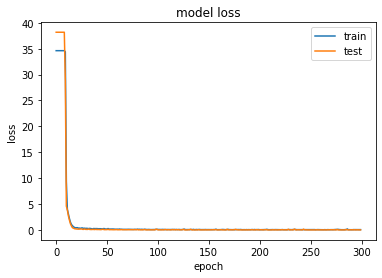

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [18]:
y_pred = model.predict(X_test)

In [19]:
X_test = X_test.reshape((X_test.shape[0], 3))

In [20]:
# Invert scaling for prediction
inv_x = np.concatenate((y_pred, X_test[:, -3:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_y_pred = inv_x[:,0]

# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, -3:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [21]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_pred))
print('RMSE value : {}'.format(rmse))

# calculate R2 Score
r2 = r2_score(inv_y, inv_y_pred)
print("R2 Score : {}".format(r2))

RMSE value : 1.4492922461049327
R2 Score : 0.9973156424206046


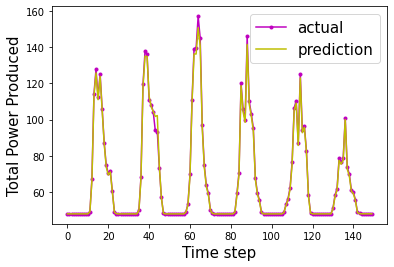

In [22]:
ap=[x for x in range(150)]
plt.plot(ap, inv_y[:150], marker='.',color='m',label="actual")
plt.plot(ap, inv_y_pred[:150], color='y', label="prediction")
plt.ylabel('Total Power Produced', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
ap=[x for x in range(24)]
plt.plot(ap, inv_y[:24], marker='.',color='m',label="actual")
plt.plot(ap, inv_y_pred[:24], color='y', label="prediction")
plt.ylabel('Total Power Produced', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

NameError: name 'plt' is not defined

**KALMAN**


In [23]:
pip install pykalman


In [24]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

GAP_test= df_hourly.Total

# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],    # The value for At. It is a random walk so is set to 1.0
                  observation_matrices = [1],   # The value for Ht.
                  initial_state_mean = 0,       # Any initial value. It will converge to the true state value.
                  initial_state_covariance = 1, # Sigma value for the Qt in Equation (1) the Gaussian distribution
                  observation_covariance=1,     # Sigma value for the Rt in Equation (2) the Gaussian distribution
                  transition_covariance=1)    # A small turbulence in the random walk parameter 1.0
# Get the Kalman smoothing
state_means, _ = kf.filter(GAP_test.values)

# Call it KF_mean
GAP_kf = np.array(state_means)
GAP_kf

array([[ 7.62719444],
       [12.20354861],
       [14.08102724],
       [14.80582353],
       [15.08309551],
       [15.18912146],
       [15.229506  ],
       [15.24498344],
       [15.25093804],
       [15.25310194],
       [15.2538611 ],
       [15.31974353],
       [16.79588257],
       [23.00986097],
       [26.94982533],
       [26.5920759 ],
       [26.3503686 ],
       [24.32869823],
       [22.37427413],
       [20.56037899],
       [19.43337223],
       [19.02481348],
       [17.73555114],
       [16.26699696],
       [15.64357988],
       [15.4000325 ],
       [15.30695821],
       [15.27148279],
       [15.25785239],
       [15.25262526],
       [15.25057812],
       [15.24975378],
       [15.24948972],
       [15.249342  ],
       [15.24925192],
       [15.36715977],
       [16.90478187],
       [23.27334174],
       [28.32450979],
       [30.20601757],
       [27.66219349],
       [24.34120415],
       [22.60720586],
       [22.05386791],
       [21.83708786],
       [20

In [25]:
# calculate RMSE

rmse = np.sqrt(mean_squared_error(GAP_test, GAP_kf))
print('RMSE value : {}'.format(rmse))

# calculate R2 Score
r2 = r2_score(GAP_test, GAP_kf)
print("R2 Score : {}".format(r2))

RMSE value : 1.158566017541497
R2 Score : 0.9424723619875698


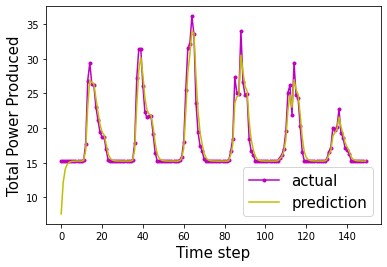

In [26]:
ap=[x for x in range(150)]
plt.plot(ap, GAP_test[:150], marker='.',color='m',label="actual")
plt.plot(ap, GAP_kf[:150], color='y', label="prediction")
plt.ylabel('Total Power Produced', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

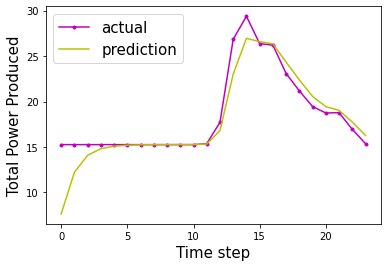

In [32]:
ap=[x for x in range(24)]
plt.plot(ap, GAP_test[:24], marker='.',color='m',label="actual")
plt.plot(ap, GAP_kf[:24], color='y', label="prediction")
plt.ylabel('Total Power Produced', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

**LSTM+KALMAN**

In [27]:
kf = KalmanFilter(initial_state_mean=inv_y[0])
kf = kf.em(inv_y, n_iter=1, em_vars='all')
measurements_predicted = (kf.smooth(inv_y_pred)[0])[:, 0]

In [28]:
import math
trainScore1 = math.sqrt(mean_squared_error(inv_y, inv_y_pred))
trainScore1_r2 = r2_score(inv_y, inv_y_pred)
print('Score Before Kalman Filtering: %.2f RMSE and %.2f R-Square' % (trainScore1, trainScore1_r2))

Score Before Kalman Filtering: 1.45 RMSE and 1.00 R-Square


In [29]:
trainScore2 = math.sqrt(mean_squared_error(inv_y, measurements_predicted))
trainScore2_r2 = r2_score(inv_y, measurements_predicted)
print('Score After Kalman Filtering: %.2f RMSE and %.2f R-Square' % (trainScore2, trainScore2_r2))


Score After Kalman Filtering: 4.43 RMSE and 0.97 R-Square


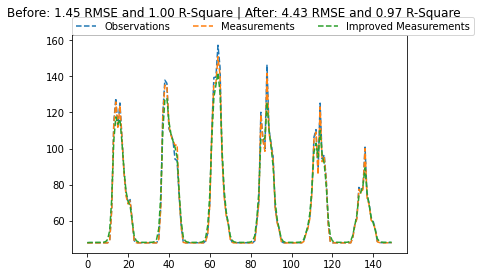

In [30]:
line1, = plt.plot(inv_y, label="Observations", linestyle='--')
line2, = plt.plot(inv_y_pred, label="Measurements", linestyle='--')
line3, = plt.plot(measurements_predicted, label="Improved Measurements", linestyle='--')

plt.legend(handles=[line1, line2, line3], bbox_to_anchor=(0., 1, 1.2, 1), loc=3, borderaxespad=0., mode='expand',
           ncol=3)

#plt.xlabel('Time step')
#plt.ylabel('Global Active Power')
plt.suptitle('Before: %.2f RMSE and %.2f R-Square | After: %.2f RMSE and %.2f R-Square' % (
trainScore1, trainScore1_r2, trainScore2, trainScore2_r2))

plt.show()